# Exercise Sheet 2 - Least-Squares and QR decomposition

**Submission until November 14 at 2 p.m. in the corresponding folder in StudIP.** \
For this exercise we want to use the QR decomposition to solve least-squares problems. The general least-squares problem is given as $$\min_{w\in\mathbb{R}^n} ||y - Xw||_2^2$$ with matrix $X \in \mathbb{R}^{m,n}$ and vector $y \in \mathbb{R}^m$.

## (1) Solving a Least-Squares System

We consider a two-dimensional classification problem, i.e., we have a matrix $X \in \mathbb{R}^{m,2}$ with $m$ data points. 

**Task: Load $X$ and $y$ using the following code. Then visualize the data in a 3d scatter plot. (3 points)**

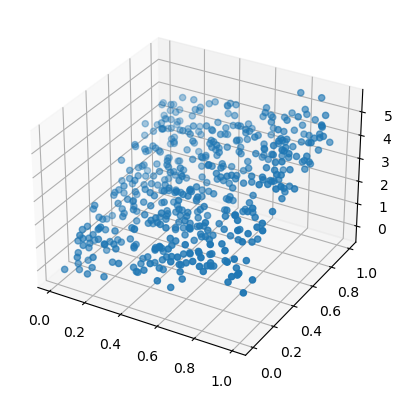

In [1]:
import matplotlib.pyplot as plt
import numpy as np

d = 2
m = 500
noise_intensity = 2

X = np.random.rand( m, d )
y = noise_intensity*(np.random.rand( m )-0.5)

def hp(x):
    w = np.array( [4,6,-2] )
    return (-w[0]*x[0]-w[1]*x[1])/w[2]

for i in range(m):
    y[i] += hp( X[i,:] )
    
### 3d scatter plot:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],y)

Now, we want to find a hyperplane that fits our data by solving the least-squares problem above using the QR decomposition. 

**Task: Find the QR decomposition of $X$ using either your own QR method or the QR method from numpy. (1 point)**

*Hint: You only need the $n\times n$ part of the matrix $R$ if you are using your own QR. (skinny QR)*

In [2]:
q,r=np.linalg.qr(X)

**Task: Solve the minimization problem with the matrices $Q$ and $R$. Plot the original data again and the resulting hyperplane (from the solution vector $w$) using a 3d surface plot! (4 points)***

Hint: You can use `np.linalg.solve` to solve the problem and `plot_surface` to plot a 3d surface.

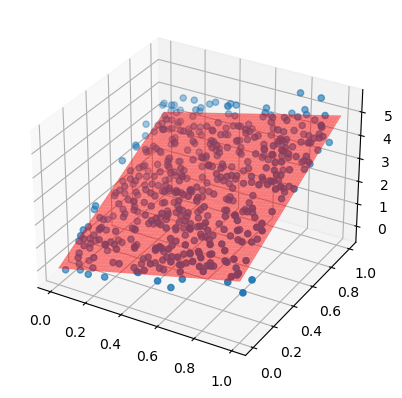

159.87455981250656


In [3]:
w = np.linalg.solve(r,q.T@y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

a,b = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
z = a*w[0]+b*w[1]

ax.plot_surface(a,b,z,color="red",alpha=0.5)
ax.scatter(X[:,0],X[:,1],y)
plt.show()
print(np.linalg.norm((X@w)-y)**2)

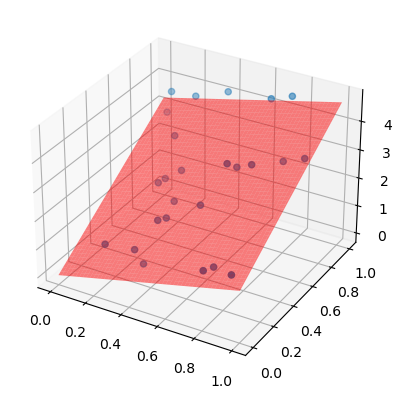

7.700633551391034


In [4]:
X = X[:25]
y = y[:25]
q,r=np.linalg.qr(X)
w = np.linalg.solve(r,q.T@y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

a,b = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
z = a*w[0]+b*w[1]

ax.plot_surface(a,b,z,color="red",alpha=0.5)
ax.scatter(X[:,0],X[:,1],y)
plt.show()

print(np.linalg.norm((X@w)-y)**2)

**Task: Check how the number of points $m$ and the noise intensity influence your result by manipulating the parameters and executing your code again! What do you observe? (2 points)**  
High m: good approximation of result  (higher deviation of y)  
low m: for m = n exact solution but random approximation (lower deviation of y, for m=n 0 deviation)  
noise does not impact the result of the approximation that much depends mainly on m  
high noise: high deviation  
low noise: low deviation  

### Points 10/10

## (2) Nonlinear Models

Instead of using linear models, one can also use non-linear ansatz functions, e.g., polynomial or exponential fitting.

### (2.1) Polynomial ansatz functions
**Task:
Given the one-dimensional nodes `poly_x`$=(1, 2.5, 4, 5.3, 7)$ and function values `poly_y`$=(15, 17.625, 30, 40, 55)$,**
```
poly_x = np.array([1, 2.5, 4, 5.3, 7])
poly_y = np.array([15, 17.625, 30, 40, 55])
```
**perform a least-squares fit for the linear, quadratic, and cubic polynomial ansatz functions**
\begin{align}
p_1(x) &= a_1 x + a_0, \\
p_2(x) &= a_2 x^2 + a_1 x + a_0, \\
p_3(x) &= a_3 x^3 + a_2 x^2 + a_1 x + a_0,
\end{align}
**where the coefficients $a_i$ can be determined using the `numpy.linalg.lstsq` function.**

**Visualize the original data and the resulting least-squares fits in one plot. (4 points)**

[[1.  1. ]
 [1.  2.5]
 [1.  4. ]
 [1.  5.3]
 [1.  7. ]]


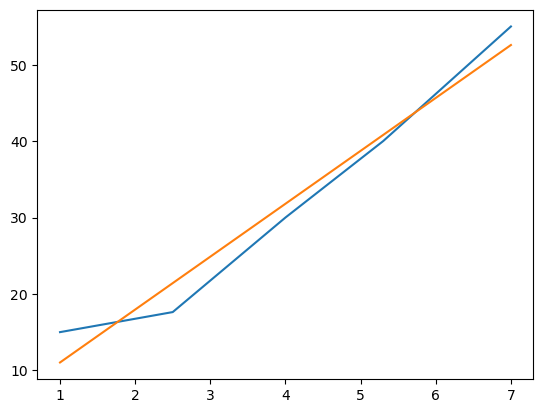

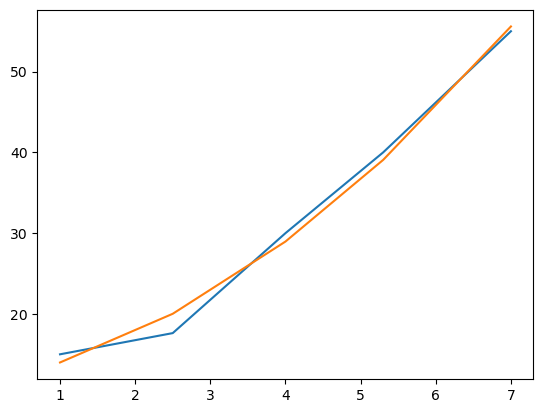

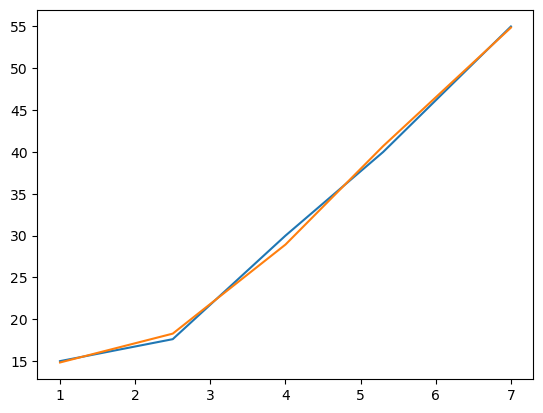

In [7]:
poly_x = np.array([1, 2.5, 4, 5.3, 7])
poly_y = np.array([15, 17.625, 30, 40, 55])

def kernel(x,d):
    tmp = np.empty(0).reshape((0,len(x)))
    for i in range(d):
        tmp = np.vstack((tmp,x**i))
    return tmp.T
print(kernel(poly_x,2))

for i in range(2,5):
    k = kernel(poly_x,i)
    a,_,_,_ = np.linalg.lstsq(k,poly_y,rcond=None)
    plt.plot(poly_x,poly_y)
    plt.plot(poly_x,k@a)
    plt.show()

### (2.2) Exponential ansatz function
**Task:
Given the one-dimensional nodes `exp_x`$=(0, 0.5, 1, 1.5, 2)$ and function values `exp_y`$=(3, 1.6, 0.99, 0.46, 0.25)$,**
```
exp_x = np.array([0, 0.5, 1, 1.5, 2])
exp_y = np.array([3, 1.6, 0.99, 0.46, 0.25])
```
**perform a least-squares fit for the exponential ansatz function**
$$
f(x) = C \exp(a x)
$$
**where the coefficients $C$ and $a$ can be determined using the `numpy.linalg.lstsq` function.**

**Visualize the original data and the resulting least-squares fit in one plot. (2 points)**

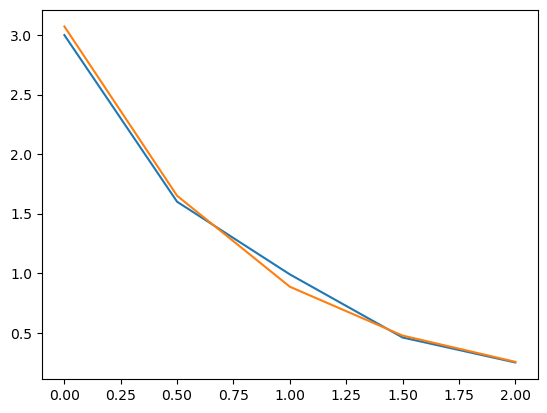

In [8]:
exp_x = np.array([0, 0.5, 1, 1.5, 2])
exp_y = np.array([3, 1.6, 0.99, 0.46, 0.25])

def exp_kernel(x):
    tmp = np.ones(len(x))
    tmp = np.vstack((tmp,x))
    return tmp.T

k = exp_kernel(exp_x)
a,_,_,_ = np.linalg.lstsq(k,np.log(exp_y),rcond=None)

plt.plot(exp_x,exp_y)
plt.plot(exp_x,np.exp(k@a))

### Points 6/6

## (3) Comparison of normal equation and QR decomposition for least squares


**Task:
Next, we want to compare solving least squares by the normal equation and by the QR decomposition for an ill-posed case.
Given the one-dimensional nodes `x`$=(1, 1.000000002, 1.000000004)$ and function values `b`$=(2, 2.0000000001, 2.0000000004)$,**
```
x = np.array([1,1.000000002,1.000000004])
b = np.array([2,2.0000000001,2.0000000004])
```
**perform a least-squares fit for the linear ansatz function**
$$
p_1(x) = a_1 x + a_0
$$
by solving the normal equation
$$
 A^\ast A \, \boldsymbol{x} = A^\ast \boldsymbol{b}
$$
**using the `numpy.linalg.solve` function. Compare the results with the least-squares fit obtained by the QR decomposition and the `numpy.linalg.lstsq` function.**

**Visualize the original data and the resulting least-squares fits in one plot. Why do we obtain different results? ( 4 points)**
We dont

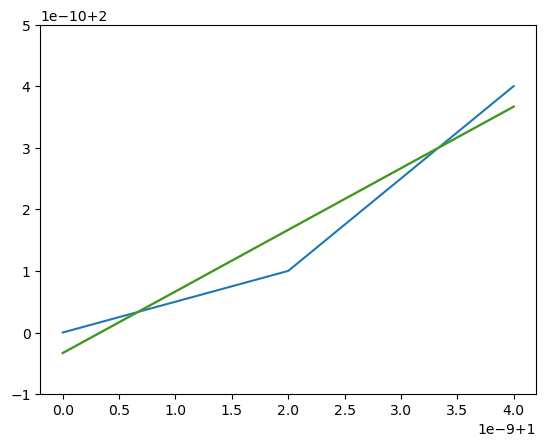

In [9]:
x = np.array([1.000000000,1.000000002,1.000000004])
b = np.array([2.000000000,2.0000000001,2.0000000004])
k = kernel(x,2)
a,_,_,_ = np.linalg.lstsq(k,b,rcond=None) 
q,r = np.linalg.qr(k)
w = np.linalg.solve(r,q.T@b)

plt.plot(x,b)
plt.plot(x,k@a)
plt.plot(x,k@w)
plt.ylim(1.9999999999,2.0000000005)
plt.show() #-3 points, most of the exercise is missing

### Points 1/4

## Total Points 17/20